In [37]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch, VerticalPitch

from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

In [3]:
competitions = sb.competitions()

C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [6]:
matches = sb.matches(competition_id=9, season_id=281)

C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [7]:
matches['match_id']

0     3895302
1     3895292
2     3895333
3     3895340
4     3895348
5     3895286
6     3895220
7     3895250
8     3895266
9     3895275
10    3895180
11    3895134
12    3895121
13    3895107
14    3895074
15    3895139
16    3895086
17    3895320
18    3895309
19    3895258
20    3895244
21    3895232
22    3895210
23    3895202
24    3895194
25    3895182
26    3895167
27    3895158
28    3895153
29    3895113
30    3895095
31    3895067
32    3895060
33    3895052
Name: match_id, dtype: int64

In [11]:
events = sb.events(match_id=3895302, include_360_metrics=True)

C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Exception: 360 metrics not available in open data

In [14]:
frames_df = sb.competition_frames(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [15]:
events_df = sb.competition_events(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

C:\Users\akhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [42]:
events_of_1_match = events_df[events_df['match_id'] == 3895302]
# useful_columns = ['type', 'shot_statsbomb_xg', 'team', 'player', 'location', 'pass_assisted_shot_id']
# events_of_1_match = events_of_1_match[useful_columns]

In [54]:
events_of_1_match.type.unique()
passes_mask = (events_of_1_match.type == 'Pass') & (events_of_1_match.team == "Bayer Leverkusen")
passes = events_of_1_match[passes_mask]
passes

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:00:19.820,Pass,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:00:23.749,Pass,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:00:27.644,Pass,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:00:28.746,Pass,NaN
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:00:37.056,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:43:45.947,Pass,NaN
1370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:43:52.191,Pass,NaN
1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:43:55.634,Pass,True
1372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:44:00.717,Pass,NaN


C:\Users\akhil\AppData\Local\Temp\ipykernel_12932\713959200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_df['position_start_x'] = pass_df.location.apply(lambda x: x[0])
C:\Users\akhil\AppData\Local\Temp\ipykernel_12932\713959200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_df['position_start_y'] = pass_df.location.apply(lambda x: x[1])
C:\Users\akhil\AppData\Local\Temp\ipykernel_12932\713959200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

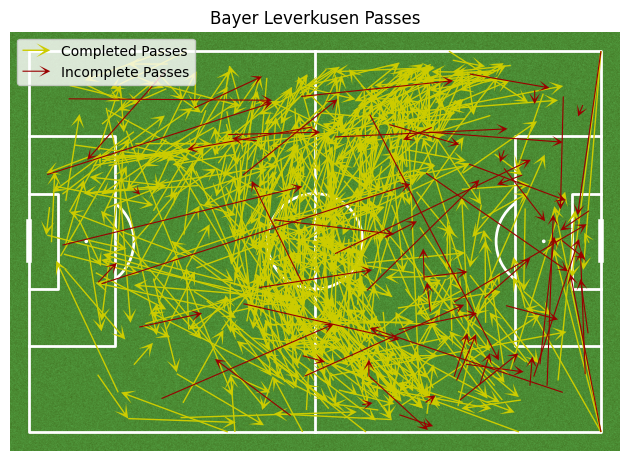

In [63]:
pass_df = passes    # boolean mask if the pass is completed
pass_df['position_start_x'] = pass_df.location.apply(lambda x: x[0])
pass_df['position_start_y'] = pass_df.location.apply(lambda x: x[1])
pass_df['position_end_x'] = pass_df.pass_end_location.apply(lambda x: x[0])
pass_df['position_end_y'] = pass_df.pass_end_location.apply(lambda x: x[1])
# # Select rows where period is 2
# mask = pass_df['period'] == 2

# # Apply the transformation row-wise
# pass_df.loc[mask, 'position_start_x'] = 120 - pass_df.loc[mask, 'position_start_x']
# pass_df.loc[mask, 'position_start_y'] = 80 - pass_df.loc[mask, 'position_start_y']
# pass_df.loc[mask, 'position_end_x'] = 120 - pass_df.loc[mask, 'position_end_x']
# pass_df.loc[mask, 'position_end_y'] = 80 - pass_df.loc[mask, 'position_end_y']
team = "Bayer Leverkusen"
complete_pass_mask = pass_df.pass_outcome.isnull()
completed_passes = pass_df[complete_pass_mask]
Incomplete_passes = pass_df[~complete_pass_mask]
# setup the pitch
pitch = Pitch(pitch_color='grass', line_color='white')
fig, ax = pitch.draw()
# plot the completed passes arrows
pitch.arrows(
    xstart=completed_passes.position_start_x, ystart=completed_passes.position_start_y, xend=completed_passes.position_end_x,
    yend=completed_passes.position_end_y, width=1, ax=ax, headwidth=10, headlength=10, color='#cccc00',
    label='Completed Passes')
# plot the Incomplete passes arrows
pitch.arrows(
    xstart=Incomplete_passes.position_start_x, ystart=Incomplete_passes.position_start_y, xend=Incomplete_passes.position_end_x,
    yend=Incomplete_passes.position_end_y, width=0.8, ax=ax, headwidth=10, headlength=10, color='#990000',
    label='Incomplete Passes')
# set the title
ax.set_title(f'{team} Passes')
# set the legend
ax.legend(loc='upper left')
plt.show()